# Maze with Q-Table



In [1]:
import numpy as np
from matplotlib.pyplot import *

left = 0; right = 1; up = 2; down = 3

## Environment

In [2]:
def Maze(position,action):
    dead = False
    actions = {left: [0,-1], right: [0,1], up: [-1,0], down: [1,0]}
    state_matrix = np.array([[1, 1, 1, 1, 1, 1, 1],
                             [1, 0, 0, 0, 0, 0, 1],
                             [1, 0, 0, 0, 0, 0, 1],
                             [1, 0, 0, 1, 0, 0, 1],
                             [1, 0, 0, 1, 0, 0 ,1],
                             [1, 0, 0, 1, 0, 2, 1],
                             [1, 1, 1, 1, 1, 1, 1]])
    
    rewards = [-1, -100, 50]
    
    new_position = np.array(position) + np.array(actions[action])
    new_state = state_matrix[new_position[0],new_position[1]]
    reward = rewards[new_state]
    win = (new_state == 2)
    if new_state == 1 or new_state == 2:
        dead = True
    
    return reward, new_position, dead, win

## Q-table training

In [3]:
# initialize Q table
Q = np.zeros((7,7,4))
# learning rates
lr = 0.8
y = 0.95
num_episodes = 100
# starting position
p0 = [5,1]
# save positions and rewards
rList = []
xList = []
yList = []
wins = 0
for i in range(num_episodes):
    p = p0
    rAll = []
    xAll = [p[1]]
    yAll = [6-p[0]]
    dead = False
    step = 0
    while step < 99:
        step += 1
        p1 = p[0]; p2 = p[1]
        # choose action
        a = np.argmax(Q[p1,p2])
        # new position and reward
        r, p_new, dead, win = Maze(p,a)
        wins += win
        p1n = p_new[0]; p2n = p_new[1]
        # update Q-table
        Q[p1,p2,a] = Q[p1,p2,a] + lr*(r + y*np.max(Q[p1n,p2n]) - Q[p1,p2,a])
        p = p_new
        rAll.append(r)
        xAll.append(p[1])
        yAll.append(6-p[0])
        if dead is True:
            break
    rList.append(np.sum(rAll))
    xList.append(xAll)
    yList.append(yAll)

## Learning curve

Win rate: 0.77


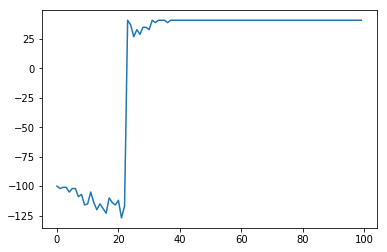

In [4]:
print("Win rate: {}".format(wins/float(num_episodes)))
plot(range(num_episodes),rList)
show()

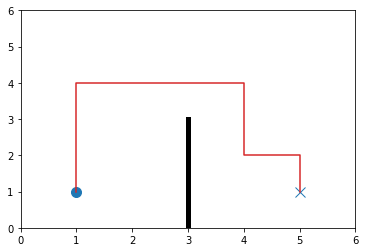

In [5]:
plot(1,1,'C0o',ms=10)
plot(5,1,'C0x',ms=10)
plot(xList[-1],yList[-1],'C3-')
plot([3,3],[0,3],'k-',lw=5)
xlim([0,6])
ylim([0,6])
show()